In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from nltk.tokenize import TreebankWordTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import sys
import argparse
import csv
from scipy.sparse import *
import pandas as pd
import regex 
from sklearn.base import TransformerMixin
from nltk.tokenize import TreebankWordTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.util import ngrams
from sklearn.model_selection import StratifiedKFold, train_test_split


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
import re

In [ ]:
!pip install emoji==0.6.0

     |████████████████████████████████| 51kB 7.4MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp37-none-any.whl size=49716 sha256=834145ab99f008c97bfce286766d1239ac552b522b27bdee7f92ea26a912debc
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [ ]:
!pip  install Arabic-Stopwords


     |████████████████████████████████| 358kB 18.8MB/s 
     |████████████████████████████████| 112kB 54.8MB/s 
  Created wheel for pyarabic: filename=PyArabic-0.6.10-cp37-none-any.whl size=113324 sha256=3cb9f54d50736f61ad84b758d6c612c47559762b45ea9fbdeaf5f5ef2500781b
  Stored in directory: /root/.cache/pip/wheels/10/b8/f5/b7c1a50e6efb83544844f165a9b134afe7292585465e29b61d
Successfully built pyarabic


In [ ]:
import arabicstopwords.arabicstopwords as stp

In [ ]:
import emoji


In [ ]:
from collections import Counter, OrderedDict


In [ ]:
import math

In [ ]:
import random
from random import seed

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/")

Mounted at /content/drive


In [ ]:
train_data=pd.read_csv('')

In [ ]:
test_data=pd.read_csv('')


In [ ]:
train_data.head(100)

,tweet,sarcasm,sentiment,dialect
0,"""د. #محمود_العلايلي:أرى أن الفريق #أحمد_شفيق ر...",False,NEU,msa
1,"""مع فيدرر يا آجا والكبار 😍 https://t.co/hrBeHb...",False,NEU,msa
2,“الداعون لمبدأ الاختلاط بين الجنسين؛ كالداعين ...,True,NEG,msa
3,"""@ihe_94 @ya78m @amooo5 @badiajnikhar @Oukasaf...",True,NEG,gulf
4,"""قل شرق حلب ولا تقل حلب الشرقية ....وقل غرب حل...",False,NEU,msa
...,...,...,...,...
95,"""رامى عياش عملى لايك على اغنيته 😍🙌 https://t.c...",False,POS,egypt
96,"""@140041Saud الرياض حي الواحةتقاطع شارع رفحاء ...",False,NEU,egypt
97,لو أنت من الناس اللي لم تؤيد أو تسكت عن ظلم أو...,False,NEU,msa
98,الهجوم المتوقع على كرداسة متى يتوقفون عن قتل ا...,False,NEG,msa


In [ ]:
len(train_data)

12548

In [ ]:
len(test_data)

3000

In [ ]:
train_data.isna().sum()


tweet        0
sarcasm      0
sentiment    0
dialect      0
dtype: int64

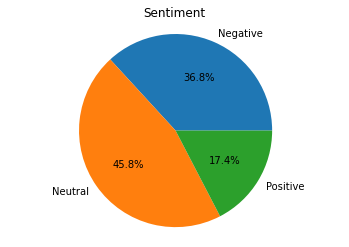

In [ ]:
import matplotlib.pyplot as plt

Tasks = [4621,5747,2180]

my_labels = 'Negative','Neutral','Positive'
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%')
plt.title('Sentiment')
plt.axis('equal')
plt.show()

In [ ]:
train_data[(train_data['sentiment']=='NEG') ].count()

tweet        4621
sarcasm      4621
sentiment    4621
dialect      4621
dtype: int64

In [ ]:
train_data[(train_data['sentiment']=='NEU') ].count()

tweet        5747
sarcasm      5747
sentiment    5747
dialect      5747
dtype: int64

In [ ]:
train_data[(train_data['sentiment']=='POS') ].count()

tweet        2180
sarcasm      2180
sentiment    2180
dialect      2180
dtype: int64

In [ ]:
NEG_DF=train_data[(train_data['sentiment']=='NEG') ]

In [ ]:
NEG_DF[(NEG_DF['dialect']=='msa') ].count()

tweet        2671
sarcasm      2671
sentiment    2671
dialect      2671
dtype: int64

In [ ]:
NEG_DF[(NEG_DF['dialect']=='egypt') ].count()

tweet        1376
sarcasm      1376
sentiment    1376
dialect      1376
dtype: int64

In [ ]:
NEG_DF[(NEG_DF['dialect']=='gulf') ].count()

tweet        264
sarcasm      264
sentiment    264
dialect      264
dtype: int64

In [ ]:
NEG_DF[(NEG_DF['dialect']=='levant') ].count()

tweet        285
sarcasm      285
sentiment    285
dialect      285
dtype: int64

In [ ]:
NEG_DF[(NEG_DF['dialect']=='magreb') ].count()

tweet        25
sarcasm      25
sentiment    25
dialect      25
dtype: int64

In [ ]:
NEU_DF=train_data[(train_data['sentiment']=='NEU') ]

In [ ]:
NEU_DF[(NEU_DF['dialect']=='magreb') ].count()

tweet        12
sarcasm      12
sentiment    12
dialect      12
dtype: int64

In [ ]:
NEU_DF[(NEU_DF['dialect']=='levant') ].count()

tweet        197
sarcasm      197
sentiment    197
dialect      197
dtype: int64

In [ ]:
NEU_DF[(NEU_DF['dialect']=='egypt') ].count()

tweet        793
sarcasm      793
sentiment    793
dialect      793
dtype: int64

In [ ]:
NEU_DF[(NEU_DF['dialect']=='gulf') ].count()

tweet        259
sarcasm      259
sentiment    259
dialect      259
dtype: int64

In [ ]:
NEU_DF[(NEU_DF['dialect']=='msa') ].count()

tweet        4486
sarcasm      4486
sentiment    4486
dialect      4486
dtype: int64

In [ ]:
POS_DF=train_data[(train_data['sentiment']=='POS') ]

In [ ]:
POS_DF[(POS_DF['dialect']=='msa') ].count()

tweet        1405
sarcasm      1405
sentiment    1405
dialect      1405
dtype: int64

In [ ]:
POS_DF[(POS_DF['dialect']=='levant') ].count()

tweet        142
sarcasm      142
sentiment    142
dialect      142
dtype: int64

In [ ]:
POS_DF[(POS_DF['dialect']=='egypt') ].count()

tweet        506
sarcasm      506
sentiment    506
dialect      506
dtype: int64

In [ ]:
POS_DF[(POS_DF['dialect']=='gulf') ].count()

tweet        121
sarcasm      121
sentiment    121
dialect      121
dtype: int64

In [ ]:
POS_DF[(POS_DF['dialect']=='magreb') ].count()

tweet        6
sarcasm      6
sentiment    6
dialect      6
dtype: int64

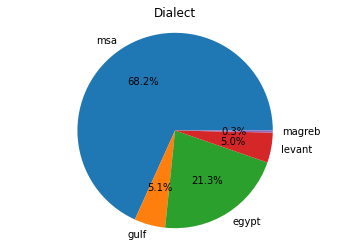

In [ ]:
Tasks = [8562,644,2675,624,43]

my_labels = 'msa','gulf','egypt','levant','magreb'
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%')
plt.title('Dialect')
plt.axis('equal')
plt.show()

In [ ]:
train_data[(train_data['dialect']=='msa') ].count()

tweet        8562
sarcasm      8562
sentiment    8562
dialect      8562
dtype: int64

In [ ]:
train_data[(train_data['dialect']=='gulf') ].count()

tweet        644
sarcasm      644
sentiment    644
dialect      644
dtype: int64

In [ ]:
train_data[(train_data['dialect']=='egypt') ].count()

tweet        2675
sarcasm      2675
sentiment    2675
dialect      2675
dtype: int64

In [ ]:
train_data[(train_data['dialect']=='levant') ].count()

tweet        624
sarcasm      624
sentiment    624
dialect      624
dtype: int64

In [ ]:
train_data[(train_data['dialect']=='magreb') ].count()

tweet        43
sarcasm      43
sentiment    43
dialect      43
dtype: int64

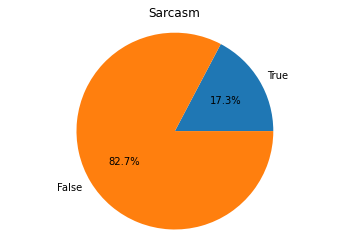

In [ ]:
Tasks = [2168,10380]
my_labels = 'True','False'
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%')
plt.title('Sarcasm')
plt.axis('equal')
plt.show()

In [ ]:
train_data[(train_data['sarcasm']==True) ].count()

tweet        2168
sarcasm      2168
sentiment    2168
dialect      2168
dtype: int64

In [ ]:
train_data[(train_data['sarcasm']==False) ].count()

tweet        10380
sarcasm      10380
sentiment    10380
dialect      10380
dtype: int64

In [ ]:
tr_df=train_data[(train_data['sarcasm']==True) ]

In [ ]:
tr_df[(tr_df['dialect']=='gulf') ].count()

tweet        157
sarcasm      157
sentiment    157
dialect      157
dtype: int64

In [ ]:
tr_df[(tr_df['dialect']=='msa') ].count()

tweet        928
sarcasm      928
sentiment    928
dialect      928
dtype: int64

In [ ]:
tr_df[(tr_df['dialect']=='egypt') ].count()

tweet        930
sarcasm      930
sentiment    930
dialect      930
dtype: int64

In [ ]:
tr_df[(tr_df['dialect']=='levant') ].count()

tweet        138
sarcasm      138
sentiment    138
dialect      138
dtype: int64

In [ ]:
tr_df[(tr_df['dialect']=='magreb') ].count()

tweet        15
sarcasm      15
sentiment    15
dialect      15
dtype: int64

In [ ]:
fl_df=train_data[(train_data['sarcasm']==False) ]

In [ ]:
fl_df[(fl_df['dialect']=='gulf') ].count()

tweet        487
sarcasm      487
sentiment    487
dialect      487
dtype: int64

In [ ]:
fl_df[(fl_df['dialect']=='msa') ].count()

tweet        7634
sarcasm      7634
sentiment    7634
dialect      7634
dtype: int64

In [ ]:
fl_df[(fl_df['dialect']=='egypt') ].count()

tweet        1745
sarcasm      1745
sentiment    1745
dialect      1745
dtype: int64

In [ ]:
fl_df[(fl_df['dialect']=='levant') ].count()

tweet        486
sarcasm      486
sentiment    486
dialect      486
dtype: int64

In [ ]:
fl_df[(fl_df['dialect']=='magreb') ].count()

tweet        28
sarcasm      28
sentiment    28
dialect      28
dtype: int64

In [ ]:
train_data.dialect.unique()


array(['msa', 'gulf', 'egypt', 'levant', 'magreb'], dtype=object)